# ***Assignement 15 Random Forest***

In [1]:
# IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [2]:
# Load the Dataset
data=pd.read_csv("/content/Company_Data (1).csv")
data

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
# getting information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# checking the number of rows and columns
data.shape

(400, 11)

In [5]:
# checking the missing values
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

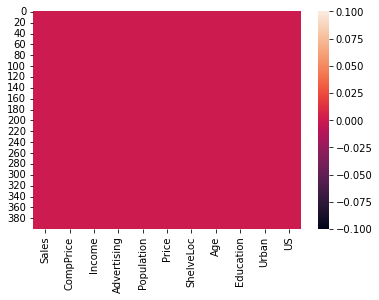

In [8]:
# visualizing missing values
sns.heatmap(data.isnull())

In [6]:
# descriptive statistics
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [9]:
# Feature Engineering We need to convert Sales column into categorical type 
data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

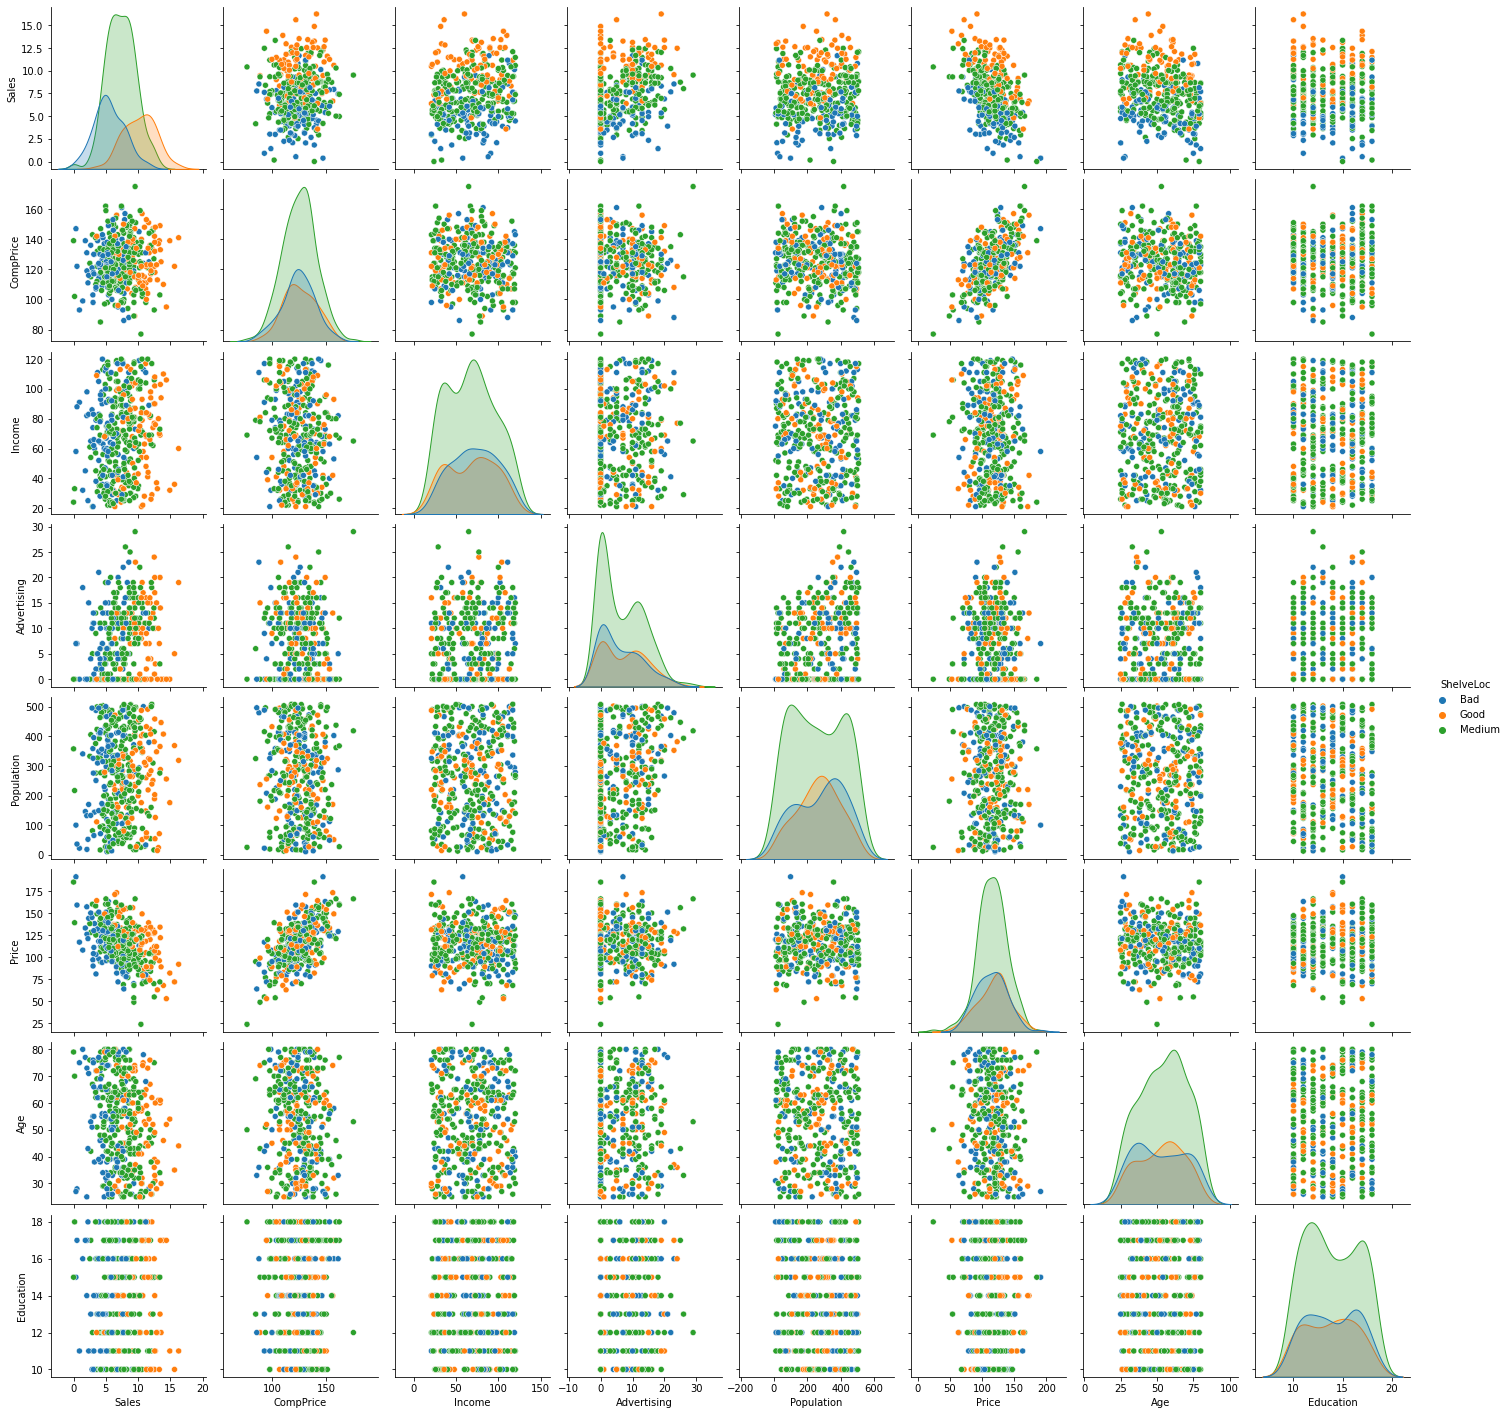

In [10]:
# Plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = 'ShelveLoc')

In [31]:
# Converting sales column into categorical column with label
data1=data.copy()
data1['sales_cat']=pd.cut(data1['Sales'],bins=[0,5.39,9.32,17],labels=['Low','Medium','High'],right = False)
data1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [32]:
data1.sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: sales_cat, dtype: int64

<Figure size 576x576 with 0 Axes>

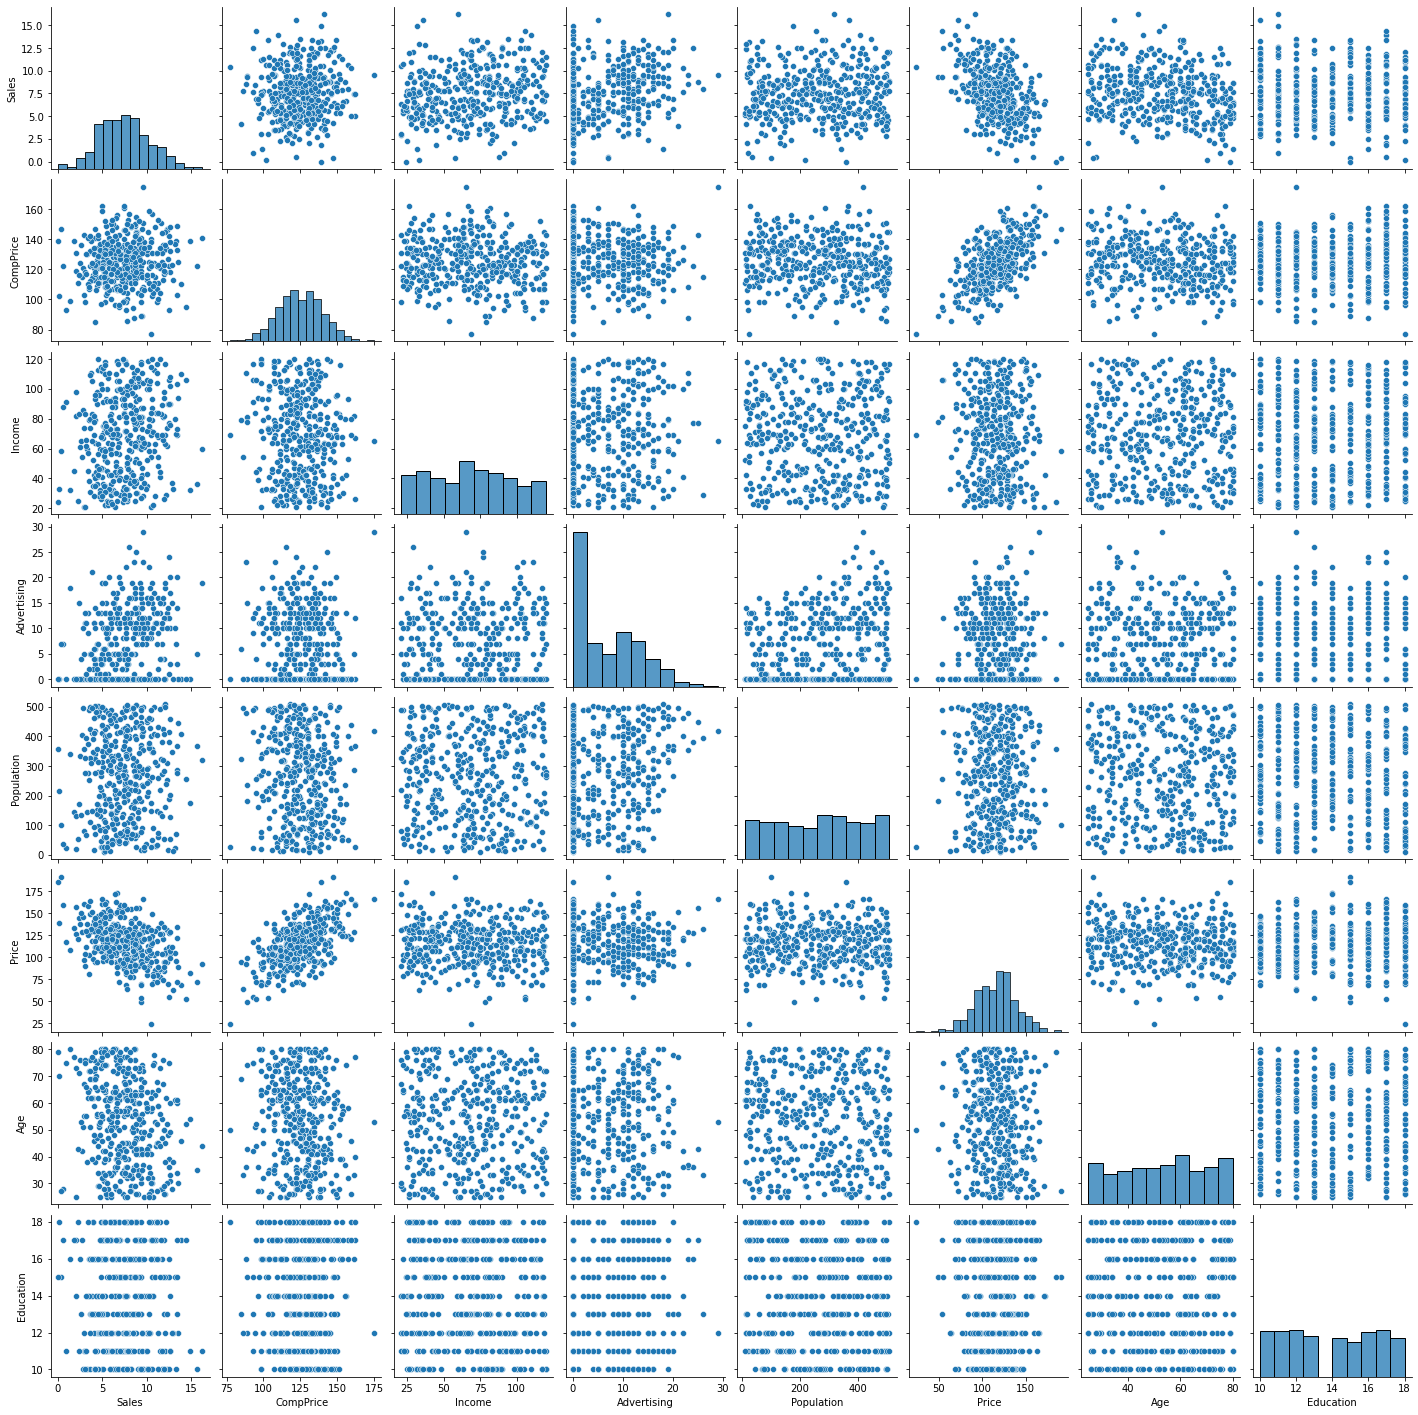

In [34]:
# Data Visualization 
plt.figure(figsize=(8,8))
sns.pairplot(data1,palette='rainbow')
plt.show()

In [35]:
#Checking for Correlation between variables 
data1.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

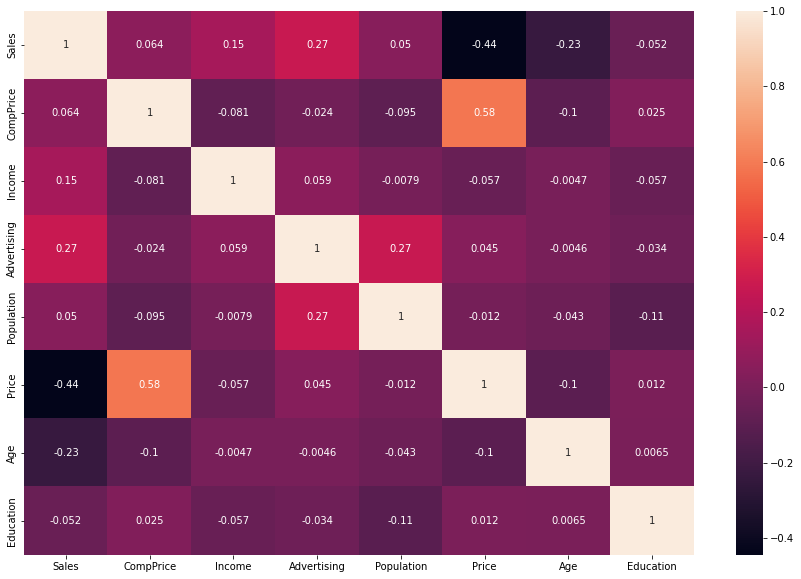

In [36]:
fig=plt.subplots(figsize=(15,10))
sns.heatmap(data1.corr(),annot=True)

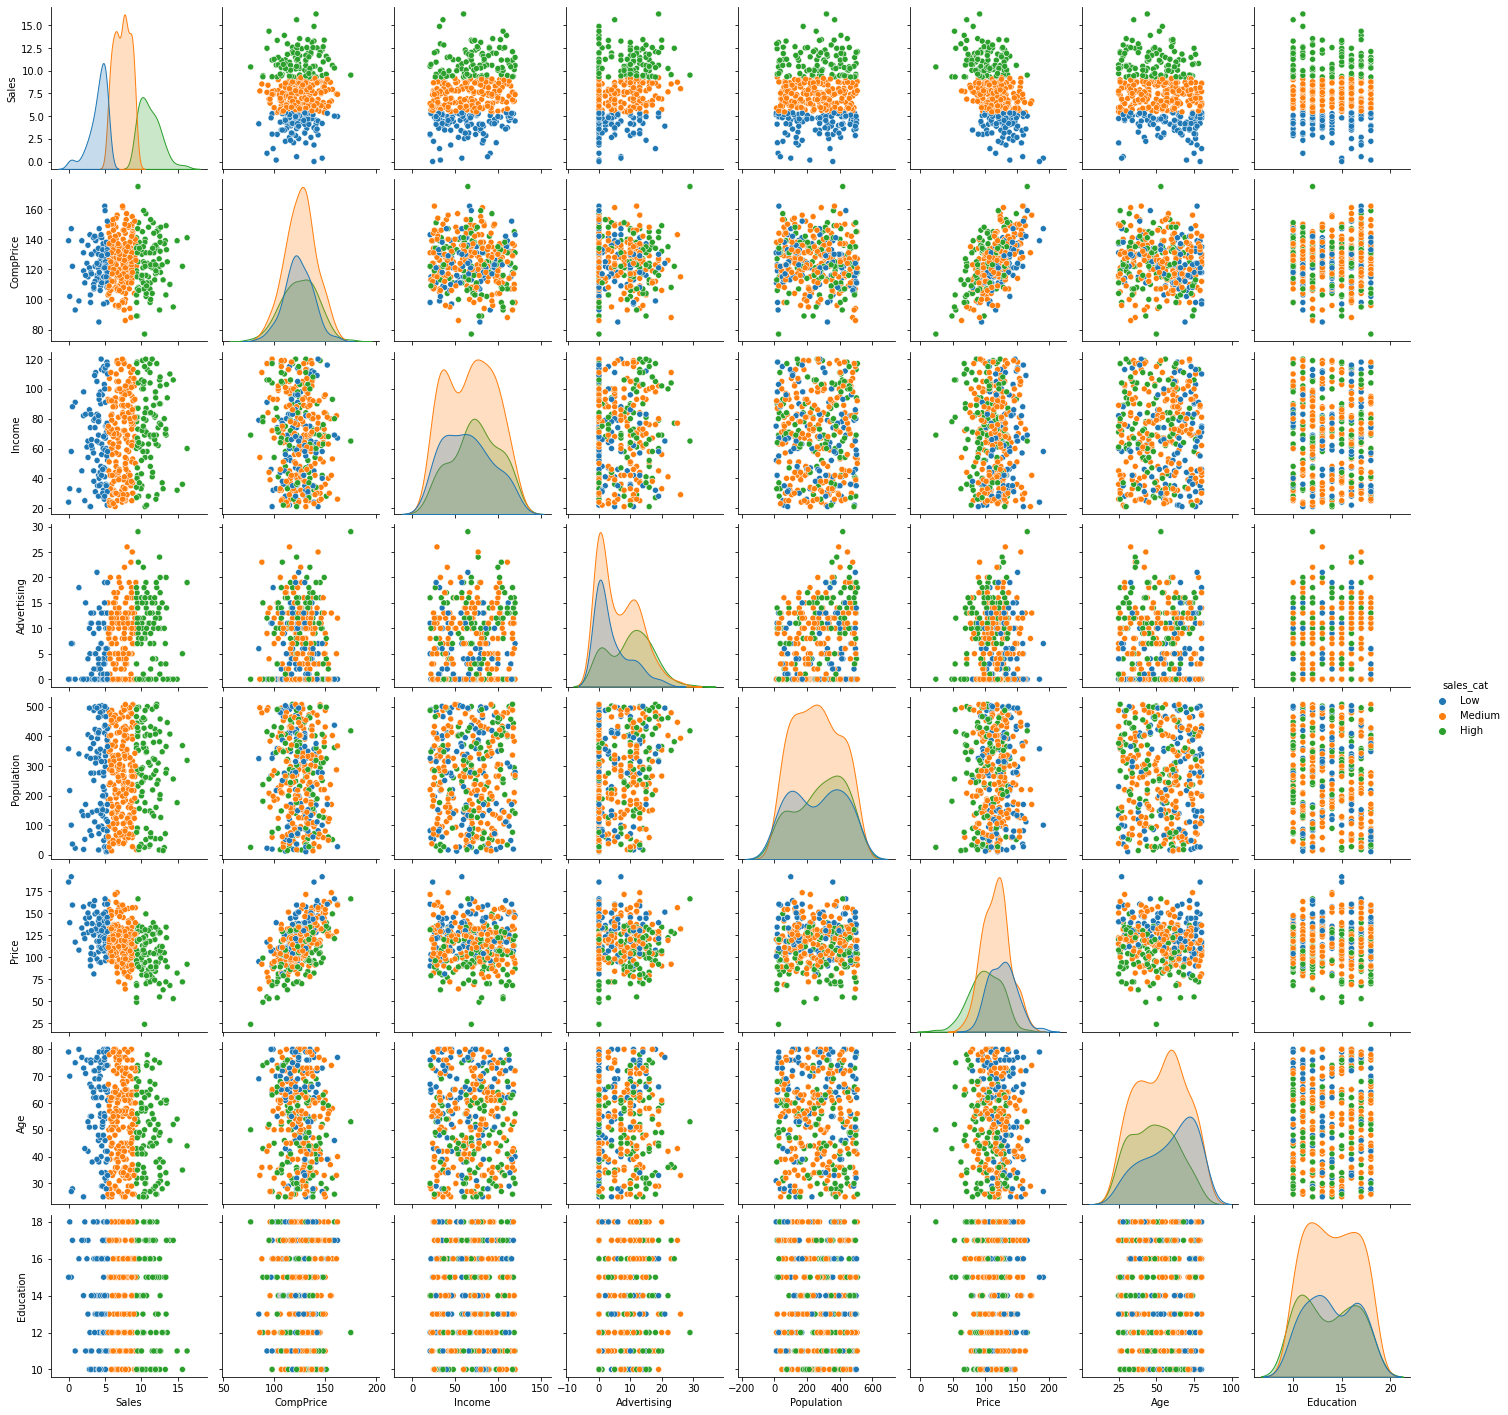

In [37]:
# Plot pair plot to visualization effects of sales category on other variables 
sns.pairplot(data=data1,hue='sales_cat')

In [38]:
# Converting categorical columns from dataset into dummies leaving target variable which we will use labelencoder
data2=data1.copy()

data2=pd.get_dummies(data2.iloc[:,:-1])
data2.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [39]:
data2['Sales_cat']=data1.sales_cat
data2.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes Sales_cat  
0      0       1      High  
1      0       1      High  
2      0       1      High  
3      0       1    Medium  
4      1       0       Low

In [40]:
# Now converting our target variable sales into categorical dummies for further processing 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data2["Sales_cat"]=le.fit_transform(data2["Sales_cat"])
data2.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales_cat  
0      0       1          0  
1      0       1          0  
2      0       1          0  
3      0       1          2  
4      1       0          1

In [41]:
data2['Sales_cat'].value_counts()

2    198
0    102
1    100
Name: Sales_cat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

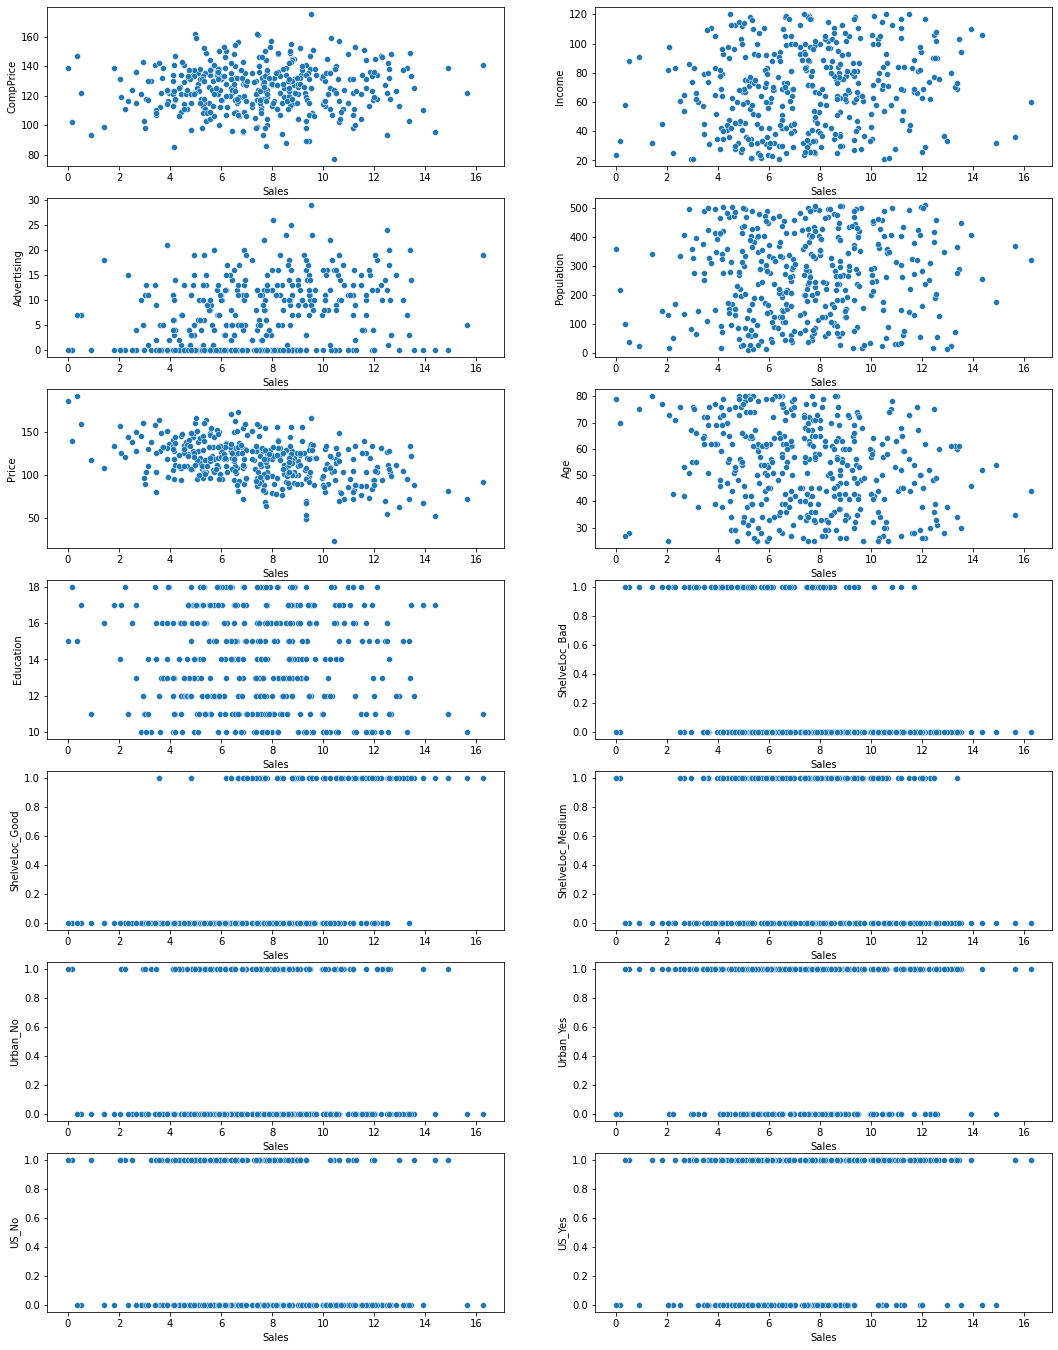

In [42]:
# Now we plot the individual plot for all dependent vs independent variable to check which
# variable have maximum effect and which are not having any significant effect in our data 
fig, ax =plt.subplots(7,2, figsize=(18,24))
sns.scatterplot(data2['Sales'],data2['CompPrice'],ax=ax[0,0])
sns.scatterplot(data2['Sales'],data2['Income'],ax=ax[0,1])
sns.scatterplot(data2['Sales'],data2['Advertising'],ax=ax[1,0])
sns.scatterplot(data2['Sales'],data2['Population'],ax=ax[1,1])
sns.scatterplot(data2['Sales'],data2['Price'],ax=ax[2,0])
sns.scatterplot(data2['Sales'],data2['Age'],ax=ax[2,1])
sns.scatterplot(data2['Sales'],data2['Education'],ax=ax[3,0])
sns.scatterplot(data2['Sales'],data2['ShelveLoc_Bad'],ax=ax[3,1])
sns.scatterplot(data2['Sales'],data2['ShelveLoc_Good'],ax=ax[4,0])
sns.scatterplot(data2['Sales'],data2['ShelveLoc_Medium'],ax=ax[4,1])
sns.scatterplot(data2['Sales'],data2['Urban_No'],ax=ax[5,0])
sns.scatterplot(data2['Sales'],data2['Urban_Yes'],ax=ax[5,1])
sns.scatterplot(data2['Sales'],data2['US_No'],ax=ax[6,0])
sns.scatterplot(data2['Sales'],data2['US_Yes'],ax=ax[6,1])

In [43]:
# Dropping the columns 
data3=data2.copy()
data3=data3.drop('ShelveLoc_Bad',axis=1)
data3=data3.drop('ShelveLoc_Good',axis=1)
data3=data3.drop('ShelveLoc_Medium',axis=1)
data3=data3.drop('Urban_No',axis=1)
data3=data3.drop('Urban_Yes',axis=1)
data3=data3.drop('US_No',axis=1)
data3=data3.drop('US_Yes',axis=1)
data3

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0     9.50        138      73           11         276    120   42         17   
1    11.22        111      48           16         260     83   65         10   
2    10.06        113      35           10         269     80   59         12   
3     7.40        117     100            4         466     97   55         14   
4     4.15        141      64            3         340    128   38         13   
..     ...        ...     ...          ...         ...    ...  ...        ...   
395  12.57        138     108           17         203    128   33         14   
396   6.14        139      23            3          37    120   55         11   
397   7.41        162      26           12         368    159   40         18   
398   5.94        100      79            7         284     95   50         12   
399   9.71        134      37            0          27    120   49         16   

     Sales_cat  
0            0  
1            0  
2            0  
3            2  
4            1  
..         ...  
395          0  
396          2  
397          2  
398          2  
399          0  

[400 rows x 9 columns]

In [44]:
data3.drop('Sales',axis=1,inplace=True)
data3

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     Sales_cat  
0            0  
1            0  
2            0  
3            2  
4            1  
..         ...  
395          0  
396          2  
397          2  
398          2  
399          0  

[400 rows x 8 columns]

In [45]:
# Renaming Target variable for Easy Understanding of Model 
data3=data3.rename({'Sales_cat':'sales'},axis=1)
data3.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  sales
0        138      73           11         276    120   42         17      0
1        111      48           16         260     83   65         10      0
2        113      35           10         269     80   59         12      0
3        117     100            4         466     97   55         14      2
4        141      64            3         340    128   38         13      1

In [46]:
# Splitting into Independent X and dependent Y variables
x=data3.iloc[:,:-1]
y=data3['sales']
x.head()

CompPrice  Income  Advertising  Population  Price  Age  Education
0        138      73           11         276    120   42         17
1        111      48           16         260     83   65         10
2        113      35           10         269     80   59         12
3        117     100            4         466     97   55         14
4        141      64            3         340    128   38         13

In [49]:
# Splitting the data into train and test for further process 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [50]:
# Building The RandomForestClassifier model 

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_tress=100
max_features=3

model=RandomForestClassifier(n_estimators=num_tress,max_features=max_features)
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [51]:
# Getting the 2 way table to visualize the correct and wrong predictions 
pd.crosstab(y_test,ypred) #Also known as confusion matrix

col_0   0  1   2
sales           
0      10  0  11
1       0  4  19
2       6  8  22

In [52]:
# Checking Model Accuracy 
np.mean(ypred==y_test)

0.45

In [53]:
# Cross checking with Kfold method of Accuracy 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.5450000000000002


In [54]:
# Calculating the Accuracy with help of bagged Decision Tree Model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart=DecisionTreeClassifier
num_tress=110
max_features=3
model2=BaggingClassifier(base_estimator=cart(criterion='gini'),n_estimators=num_tress,max_features=max_features)
results2=cross_val_score(model2,x,y,cv=kfold)

In [55]:
print(results2.mean())

0.4925


In [56]:
# Conclusion results 
i=["Accuracy"]
dm=pd.DataFrame({"RANDOM FOREST":[np.mean(ypred==y_test)*100],
                 "K-Fold":[results.mean()*100],
                 "Bagging":[results2.mean()*100]},
                index=i)
print("THE FINAL RESULTS ARE AS FOLLOWS  :")
print("\n")
dm

THE FINAL RESULTS ARE AS FOLLOWS  :




RANDOM FOREST  K-Fold  Bagging
Accuracy           45.0    54.5    49.25